In [1]:
!pip install tensorflow -qqq
!pip install keras -qqq
!pip install yfinance -qqq

In [2]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)



TensorFlow Version:  2.15.0


In [3]:
# Fetch AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
aapl_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960442,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


In [5]:
# Checking for missing values
aapl_data.isnull().sum()

# Filling missing values, if any
aapl_data.fillna(method='ffill', inplace=True)

C:\Users\Vivek Ghodmare\AppData\Local\Temp\ipykernel_12164\1046653174.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data.fillna(method='ffill', inplace=True)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))


In [7]:
X = []
y = []

for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])


In [8]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout

# # Model initialization
# model = Sequential()

# # Adding the first LSTM layer
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# # Adding additional LSTM layers
# model.add(LSTM(units=50, return_sequences=True))
# model.add(LSTM(units=50))


In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))  # Only the last time step

# Adding a Dense layer to match the output shape with y_train
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)




Epoch 1/100

25/25 [==============================] - 20s 267ms/step - loss: 0.0657 - val_loss: 0.0067
Epoch 2/100
25/25 [==============================] - 4s 158ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 3/100
25/25 [==============================] - 4s 155ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 4/100
25/25 [==============================] - 4s 151ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 5/100
25/25 [==============================] - 4s 153ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 6/100
25/25 [==============================] - 4s 162ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 7/100
25/25 [==============================] - 5s 190ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 8/100
25/25 [==============================] - 4s 147ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 9/100
25/25 [==============================] - 4s 151ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 10/100
25/25 [==============================] - 4s 162ms/step - loss: 0.0021 - va

Epoch 73/100
25/25 [==============================] - 4s 166ms/step - loss: 7.6722e-04 - val_loss: 6.8306e-04
Epoch 74/100
25/25 [==============================] - 4s 152ms/step - loss: 7.0499e-04 - val_loss: 0.0011
Epoch 75/100
25/25 [==============================] - 4s 156ms/step - loss: 5.5518e-04 - val_loss: 6.9265e-04
Epoch 76/100
25/25 [==============================] - 2s 92ms/step - loss: 5.0393e-04 - val_loss: 6.1316e-04
Epoch 77/100
25/25 [==============================] - 5s 196ms/step - loss: 5.5385e-04 - val_loss: 6.1637e-04
Epoch 78/100
25/25 [==============================] - 4s 167ms/step - loss: 5.1022e-04 - val_loss: 6.1387e-04
Epoch 79/100
25/25 [==============================] - 4s 170ms/step - loss: 5.0679e-04 - val_loss: 0.0011
Epoch 80/100
25/25 [==============================] - 4s 171ms/step - loss: 5.3387e-04 - val_loss: 6.8377e-04
Epoch 81/100
25/25 [==============================] - 4s 160ms/step - loss: 5.0891e-04 - val_loss: 6.4630e-04
Epoch 82/100
25/25 

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)



Epoch 1/100
25/25 [==============================] - 19s 235ms/step - loss: 0.0380 - val_loss: 0.0060
Epoch 2/100
25/25 [==============================] - 3s 122ms/step - loss: 0.0069 - val_loss: 0.0055
Epoch 3/100
25/25 [==============================] - 3s 117ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 5/100
25/25 [==============================] - 3s 109ms/step - loss: 0.0043 - val_loss: 0.0080
Epoch 6/100
25/25 [==============================] - 3s 120ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 7/100
25/25 [==============================] - 3s 118ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 9/100
25/25 [==============================] - 3s 117ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/100
25/25 [==============================] - 3s 109ms/step - loss: 0.0030 - val_l

25/25 [==============================] - 3s 119ms/step - loss: 6.7881e-04 - val_loss: 9.0041e-04
Epoch 81/100
25/25 [==============================] - 3s 112ms/step - loss: 6.7166e-04 - val_loss: 8.5376e-04
Epoch 82/100
25/25 [==============================] - 4s 148ms/step - loss: 6.5881e-04 - val_loss: 9.4608e-04
Epoch 83/100
25/25 [==============================] - 3s 110ms/step - loss: 8.0626e-04 - val_loss: 0.0019
Epoch 84/100
25/25 [==============================] - 3s 109ms/step - loss: 9.0528e-04 - val_loss: 0.0011
Epoch 85/100
25/25 [==============================] - 3s 115ms/step - loss: 7.0179e-04 - val_loss: 8.8397e-04
Epoch 86/100
25/25 [==============================] - 3s 115ms/step - loss: 6.7850e-04 - val_loss: 0.0011
Epoch 87/100
25/25 [==============================] - 3s 110ms/step - loss: 6.4046e-04 - val_loss: 8.2306e-04
Epoch 88/100
25/25 [==============================] - 3s 114ms/step - loss: 6.6126e-04 - val_loss: 8.5542e-04
Epoch 89/100
25/25 [===============

In [13]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Assume 'data' is your preprocessed dataset
train_size = int(len(aapl_data) * 0.8)
train_data, test_data = aapl_data[:train_size], aapl_data[train_size:]


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 permute (Permute)           (None, 50, 60)            0         
                                                                 
 reshape (Reshape)           (None, 50, 60)            0         
                                                                 
 permute_1 (Permute)         (None, 60, 50)            0         
                                                                 
 reshape_1 (Reshape)         (None, 60, 50)            0         
                                                                 
 flatten (Flatten)           (None, 3000)             

In [17]:
# Assuming X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)


Epoch 1/100
25/25 [==============================] - 18s 206ms/step - loss: 0.9674 - val_loss: 0.3508
Epoch 2/100
25/25 [==============================] - 3s 120ms/step - loss: 0.5605 - val_loss: 0.4090
Epoch 3/100
25/25 [==============================] - 3s 120ms/step - loss: 0.3068 - val_loss: 0.3503
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.2510 - val_loss: 0.3154
Epoch 5/100
25/25 [==============================] - 3s 101ms/step - loss: 0.2420 - val_loss: 0.2901
Epoch 6/100
25/25 [==============================] - 2s 99ms/step - loss: 0.1910 - val_loss: 0.2532
Epoch 7/100
25/25 [==============================] - 3s 103ms/step - loss: 0.1698 - val_loss: 0.2370
Epoch 8/100
25/25 [==============================] - 3s 107ms/step - loss: 0.1517 - val_loss: 0.2222
Epoch 9/100
25/25 [==============================] - 3s 110ms/step - loss: 0.1360 - val_loss: 0.1932
Epoch 10/100
25/25 [==============================] - 3s 104ms/step - loss: 0.1231 - val_lo

25/25 [==============================] - 3s 110ms/step - loss: 0.0111 - val_loss: 0.0136
Epoch 82/100
25/25 [==============================] - 3s 109ms/step - loss: 0.0109 - val_loss: 0.0030
Epoch 83/100
25/25 [==============================] - 3s 119ms/step - loss: 0.0119 - val_loss: 0.0080
Epoch 84/100
25/25 [==============================] - 4s 146ms/step - loss: 0.0120 - val_loss: 0.0023
Epoch 85/100
25/25 [==============================] - 3s 113ms/step - loss: 0.0105 - val_loss: 0.0065
Epoch 86/100
25/25 [==============================] - 3s 112ms/step - loss: 0.0096 - val_loss: 0.0018
Epoch 87/100
25/25 [==============================] - 3s 119ms/step - loss: 0.0099 - val_loss: 0.0010
Epoch 88/100
25/25 [==============================] - 3s 109ms/step - loss: 0.0091 - val_loss: 7.0017e-04
Epoch 89/100
25/25 [==============================] - 3s 117ms/step - loss: 0.0088 - val_loss: 0.0026
Epoch 90/100
25/25 [==============================] - 3s 110ms/step - loss: 0.0107 - val_lo

In [18]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
25/25 [==============================] - 3s 123ms/step - loss: 0.0101 - val_loss: 0.0011
Epoch 2/100
25/25 [==============================] - 3s 111ms/step - loss: 0.0105 - val_loss: 0.0016
Epoch 3/100
25/25 [==============================] - 3s 111ms/step - loss: 0.0113 - val_loss: 7.0393e-04
Epoch 4/100
25/25 [==============================] - 3s 123ms/step - loss: 0.0104 - val_loss: 9.8329e-04
Epoch 5/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0095 - val_loss: 0.0015
Epoch 6/100
25/25 [==============================] - 3s 118ms/step - loss: 0.0095 - val_loss: 8.9304e-04
Epoch 7/100
25/25 [==============================] - 3s 116ms/step - loss: 0.0106 - val_loss: 9.2925e-04
Epoch 8/100
25/25 [==============================] - 3s 116ms/step - loss: 0.0104 - val_loss: 6.5783e-04
Epoch 9/100
25/25 [==============================] - 3s 115ms/step - loss: 0.0067 - val_loss: 0.0012
Epoch 10/100
25/25 [==============================] - 3s 113ms/step - l

In [19]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)


Epoch 1/100
25/25 [==============================] - 3s 127ms/step - loss: 0.0096 - val_loss: 0.0025 - lr: 0.0010
Epoch 2/100


C:\Users\Vivek Ghodmare\anaconda3\envs\dsml28_env1\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 3s 119ms/step - loss: 0.0113 - val_loss: 0.0019 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0104 - val_loss: 0.0052 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 4s 153ms/step - loss: 0.0105 - val_loss: 8.2510e-04 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 3s 129ms/step - loss: 0.0091 - val_loss: 0.0019 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 4s 148ms/step - loss: 0.0091 - val_loss: 0.0042 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 3s 133ms/step - loss: 0.0101 - val_loss: 0.0019 - lr: 0.0010
Epoch 8/100
25/25 [==============================] - 3s 134ms/step - loss: 0.0109 - val_loss: 0.0078 - lr: 0.0010
Epoch 9/100
25/25 [==============================] - 3s 108ms/step - loss: 0.0117 - val_loss: 0.0012 - lr: 0.0010
Epoch 10/100
25/25 [==============================] - 3s 130ms/step - loss: 0.0086 - val_loss: 7

In [20]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)



6/6 [==============================] - 0s 35ms/step - loss: 0.0046
Test Loss:  0.004571161698549986


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)


6/6 [==============================] - 2s 28ms/step
Mean Absolute Error:  0.06460453335712074
Root Mean Square Error:  0.06761036954182238


C:\Users\Vivek Ghodmare\anaconda3\envs\dsml28_env1\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

try:
    # Fetch the latest 30 days of AAPL stock data
    data = yf.download('AAPL', period='3mo', interval='1d')

    # Print the fetched data to check if it's empty or contains NaN values
    print("Fetched data: ")
    print(data)

    # Check if the fetched data is empty
    if data.empty:
        raise ValueError("No data fetched for the specified period. Please check the ticker symbol and the period.")

    # Select 'Close' price and scale it
    closing_prices = data['Close'].values.reshape(-1, 1)

    # Check if closing_prices array has at least one sample
    if len(closing_prices) < 1:
        raise ValueError("No closing prices available for scaling.")

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices)

    # Load the trained model
    model = load_model('../Advanced Stock Pattern Prediction  using LSTM with the Attention  Mechanism/best_model.h5')  # Replace 'path/to/your/' with the actual directory path

    # Predict the next 4 days iteratively
    predicted_prices = []
    current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

    for i in range(4):  # Predicting 4 days
        # Get the prediction (next day)
        next_prediction = model.predict(current_batch)

        # Reshape the prediction to fit the batch dimension
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

        # Append the prediction to the batch used for predicting
        current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

        # Inverse transform the prediction to the original price scale
        predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

    print("Predicted Stock Prices for the next 4 days: ", predicted_prices)

except ValueError as ve:
    print("ValueError:", ve)

except Exception as e:
    print("Error occurred:", e)


[*********************100%%**********************]  1 of 1 completed


Fetched data: 
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-03-06  171.059998  171.240005  168.679993  169.119995  168.890915   
2024-03-07  169.149994  170.729996  168.490005  169.000000  168.771088   
2024-03-08  169.000000  173.699997  168.940002  170.729996  170.498734   
2024-03-11  172.940002  174.380005  172.050003  172.750000  172.516006   
2024-03-12  173.149994  174.029999  171.009995  173.229996  172.995346   
...                ...         ...         ...         ...         ...   
2024-05-31  191.440002  192.570007  189.910004  192.250000  192.250000   
2024-06-03  192.899994  194.990005  192.520004  194.029999  194.029999   
2024-06-04  194.639999  195.320007  193.029999  194.350006  194.350006   
2024-06-05  195.399994  196.899994  194.869995  195.869995  195.869995   
2024-06-06  195.684998  196.500000  194.949997  195.499893  195.499893   

              Volume  

In [44]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d')

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 63ms/step
Predicted Stock Prices for the next 4 days:  [192.34962, 190.4521, 188.32985, 187.50285]


In [45]:
!pip install mplfinance -qqq

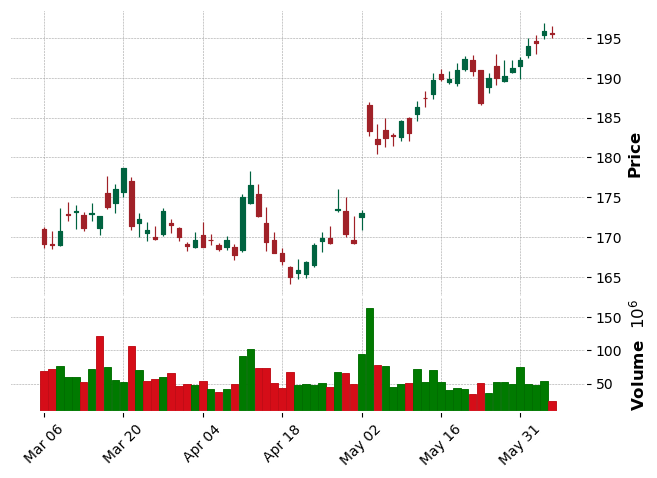

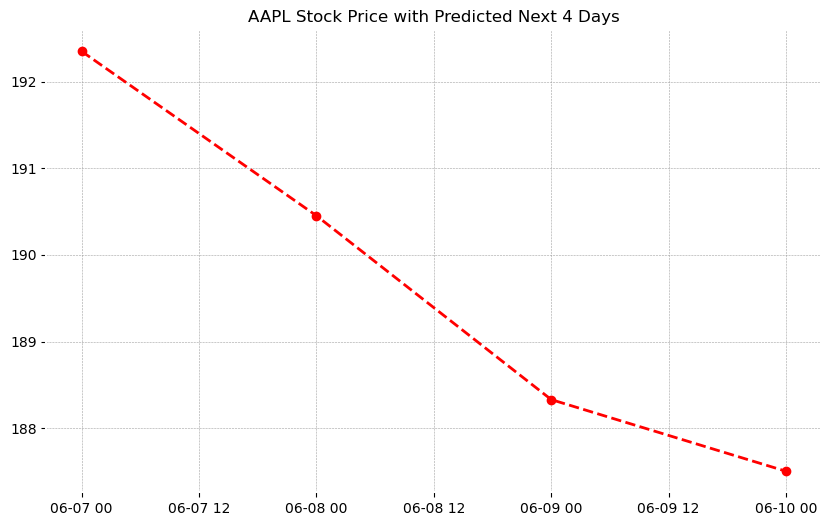

In [46]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("AAPL Stock Price with Predicted Next 4 Days")
plt.show()



[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 45ms/step


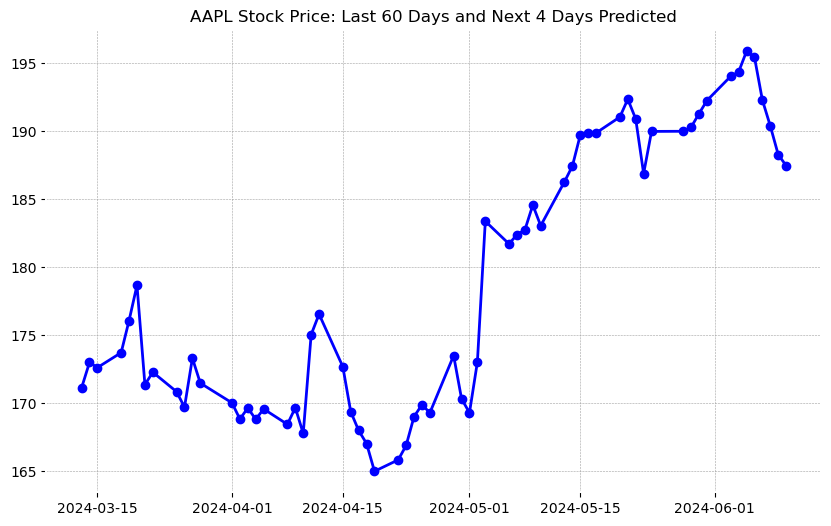

In [48]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(combined_data, linestyle='-', marker='o', color='blue')
plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.show()


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 60ms/step


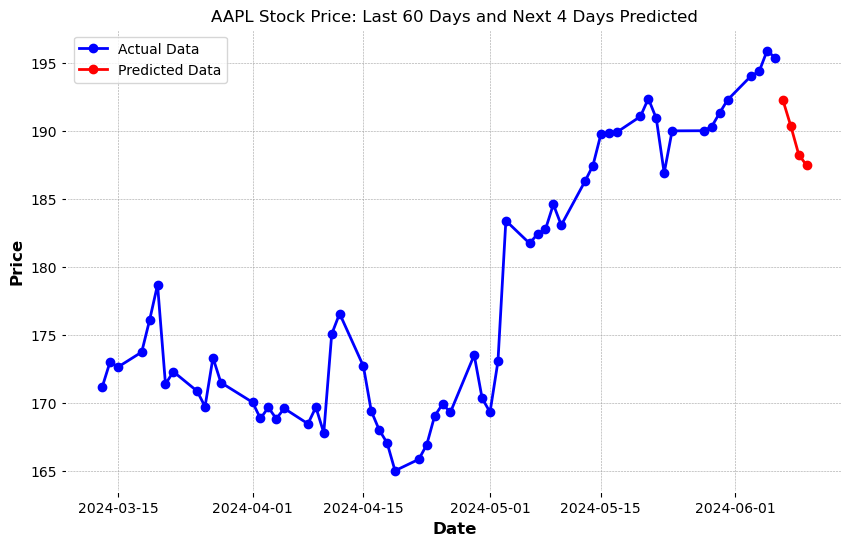

In [52]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-60:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [53]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta


def predict_stock_price(input_date):
    # Check if the input date is a valid date format
    try:
        input_date = pd.to_datetime(input_date)
    except ValueError:
        print("Invalid Date Format. Please enter date in YYYY-MM-DD format.")
        return

    # Fetch data from yfinance
    end_date = input_date
    start_date = input_date - timedelta(days=90)  # Fetch more days to ensure we have 60 trading days
    data = yf.download('AAPL', start=start_date, end=end_date)

    if len(data) < 60:
        print("Not enough historical data to make a prediction. Try an earlier date.")
        return

    # Prepare the data
    closing_prices = data['Close'].values[-60:]  # Last 60 days
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

    # Make predictions
    predicted_prices = []
    current_batch = scaled_data.reshape(1, 60, 1)

    for i in range(4):  # Predicting 4 days
        next_prediction = model.predict(current_batch)
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
        current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
        predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

    # Output the predictions
    for i, price in enumerate(predicted_prices, 1):
        print(f"Day {i} prediction: {price}")

# Example use
user_input = input("Enter a date (YYYY-MM-DD) to predict AAPL stock for the next 4 days: ")
predict_stock_price(user_input)


Enter a date (YYYY-MM-DD) to predict AAPL stock for the next 4 days: 2024-04-06


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 61ms/step
Day 1 prediction: 172.88027954101562
Day 2 prediction: 173.3296661376953
Day 3 prediction: 174.49908447265625
Day 4 prediction: 175.2051544189453
